<!--<div align="center">Семинар № 2-->

<div align="center"><font color=#4682B4 size=4 face=
                          "arial black"><em><strong>Семинар № 5</strong></em></font></div>

<div class="alert alert-block alert-info"><em>
<b>Задача.<br>
1)</b>&nbsp; Вы провели эксперимент c упрощением формы заказа в магазине Утконос и получили результаты<br> по метрике конверсий в покупку.<br>
    Выберите метод оценки и оцените есть ли стат.значимые различия между конверсиями в двух группах<br> при alpha = 5%.&nbsp;&nbsp; Дайте краткие рекомендации команде.<br>
    Результаты:&nbsp; 1) Число юзеров в группах , которые заходили на сайт в период эксперимента:<br> n1 = 15550 и n2 = 15550 .<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2) Число юзеров в группах , которые совершили хотя бы одну покупку за период эксперимента:<br>
n1 = 164 и n2 = 228. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3) Конверсии : conv1 = 1.05%,&nbsp; conv2 = 1.47% .
</em></div>

Тип данных в зксперименте:
1. Качественный, бинарный;
2. Общее количество наблюдений более 20;
3. Ожидаемое значение более 10;
4. Сопоставляемые группы независимы;
5. Количество групп сравнения равно двум.

Для этих данных отлично подходит метод оценки по статистическому критерию хи-квадрата Пирсона.

Для решения воспользуемся калькулятором по ссылке: https://www.evanmiller.org/ab-testing/chi-squared.html

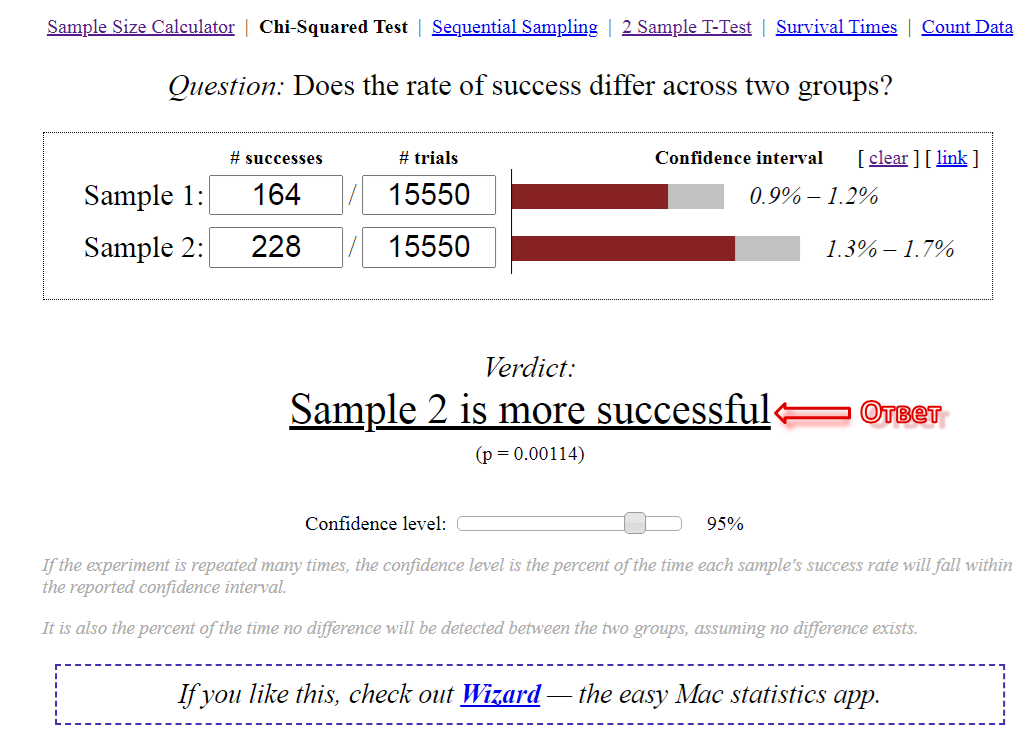

<div class="alert alert-block alert-success"><em>
<b>Рекомендации:</b><br>Статистически значимые различия между конверсиями в двух группах 
    при $\alpha = 5 \% $ <b>присутствуют</b>.<br>
Выкатить упрощенную форму заказа в магазине для всех пользователей.   
</em></div>

***

Проверим полученный результат вручную:

<h3 align="center"><em>
  Результаты эксперимента:</em>
</h3>

|  |_**Есть**<br> &nbsp;&nbsp;покупка_&nbsp;&nbsp;&nbsp;|_**Нет**<br> покупки_&nbsp;|_**сумма**_|
|:---:|:---:|:---:|:---:|
|_**1 группа**_|164     |15386 |15550|
|_**2 группа**_|228     |15332 |15550|
|_**сумма**_|392     |30708 |31100|

Расчитаем ожидаемый результат по формуле: $S_r S_c/S_t$ для каждой ячейки, где:<br>
$S_r$ - сумма по строчке;<br>
$S_c$ - сумма по колонке;<br>
$S_t$ - общая сумма.

<h3 align="center"><em>
   Ожидаемый результат:</em>
</h3>

|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|_**Есть**<br> &nbsp;&nbsp;покупка_&nbsp;&nbsp;&nbsp;|_**Нет**<br> покупки_&nbsp;|_**сумма**_|
|:---:|:---:|:---:|:---:|
|_**1 группа**_|196  |15354 |15550|
|_**2 группа**_|196  |15354 |15550|
|_**сумма**_   |392  |30708 |31100|

Расчитаем значения статистик по формуле: $( R_n - O_n )^2/O_n$ для каждой ячейки, где:<br>
$R_n$ - результат $n$-й группы;<br>
$O_n$ - ожидаемый результат $n$-й группы.

<h3 align="center"><em>
   Значения статистик:</em>
</h3>

|  |_**Есть**<br> &nbsp;покупка_&nbsp;&nbsp;|_**Нет**<br> покупки_&nbsp;|_**сумма**_|
|:---:|:---:|:---:|:---:|
|_**1 группа**_|5,2245 |0,0667 |5,2912 |
|_**2 группа**_|5,2245 |0,0667 |5,2912 |
|_**сумма**_   |10,449 |0,1334 |10,5824|

$p - value$ найдем из кумулятивной функции Хи-квадрат рапределения из библиотеки _**Python**_<br> 
для суммы статистик равной $10,5824$ и степенью свободы $(2 - 1)*(2 - 1) = 1$:

In [4]:
from scipy.stats import chi2
f'p-value = {1 - chi2.cdf(10.5824, 1):0.7f}'

'p-value = 0.0011417'

<div class="alert alert-block alert-success"><em>
Значения равны. Результат <b>подтвеждается</b>
</em></div>

***

<div class="alert alert-block alert-info"><em>
<b>2)</b>&nbsp; Сравниваем метрику конверсия в покупку. Размер выборки - 10000 элементов в каждой группе .<br>
Какой статистический критерий тут лучше всего подойдёт и почему.
</em></div>

Тип данных в зксперименте:
1. Качественный, бинарный;
2. Общее количество наблюдений более 20;
3. Ожидаемое значение более 10;
4. **НЕТ** данных по независимости групп;
5. **НЕИЗВЕСТНО** количество групп сравнения.

Поэтому возможны варианты:

|  |_**Независимые**<br> &nbsp;группы_&nbsp;&nbsp;|_**Зависимые**<br>группы_&nbsp;|_**Сравнение с заданным<br> значением**_|
|:---|:---:|:---:|:---:|
|_**2 группы**_        |Хи-квадрат<br> Пирсона |критерий<br> Мак-Нимара|- |
|_**3 и больше групп**_|Хи-квадрат Пирсона<br>с поправкой на<br> правдоподобие|Q-критерий<br> Кохрена |- |
|_**1 группа**_   |- |- |Z - критерий|



***